# Gathering data from the web - Problems

**Author:** Ties de Kok ([Personal Website](https://www.tiesdekok.com))  <br>
**Last updated:** September 2022   
**Python version:** Python 3.6+     
**Recommended environment: `researchPython`**

In [3]:
import os
recommendedEnvironment = 'researchPython'
if os.environ['CONDA_DEFAULT_ENV'] != recommendedEnvironment:
    print('Warning: it does not appear you are using the {0} environment, did you run "conda activate {0}" before starting Jupyter?'.format(recommendedEnvironment))

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: left; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Introduction</span>
</div>

<div style='border-style: solid; padding: 5px; border-color: darkred; border-width:5px;  text-align: center; margin-left: 100px; margin-right:100px;'>
<span style='color:black; font-size: 20px; font-weight:bold;'> Make sure to open up the respective tutorial notebook(s)! <br> That is what you are expected to use as primary reference material. </span>
</div>

### Relevant tutorial notebooks:

1) [`0_python_basics.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/LearnPythonforResearch/blob/master/0_python_basics.ipynb)  


2) [`2_handling_data.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/LearnPythonforResearch/blob/master/2_handling_data.ipynb)  


3) [`4_web_scraping.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/LearnPythonforResearch/blob/master/4_web_scraping.ipynb)  

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: center; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Part 1 </span>
</div>  

<div style='border-style: solid; padding: 5px; border-color: darkred; border-width:5px;  text-align: center; margin-left: 100px; margin-right:100px;'>
<span style='color:black; font-size: 15px; font-weight:bold;'> Note: feel free to add as many cells as you'd like to answer these problems, you don't have to fit it all in one cell. </span>
</div>

The goal of these problems is to get hands-on experience with gathering data from the Web using `Requests` and `Requests-HTML`.

The tasks below are split up into two sections:  

1. API tasks  

2. Web scraping tasks  

## Import required packages  

In [107]:
import os, re
from pathlib import Path
import requests
from requests_html import HTMLSession

In [2]:
import pandas as pd
import numpy as np

In [69]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By

### Also run the code below, it solves a couple of minor problems that you don't need to worry about

In [18]:
from IPython.display import HTML
import time
def show_image(url):
    return HTML('<img src="{}?{}"></img>'.format(url, int(time.time())))

In [19]:
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

<div style='border-style: solid; padding: 5px; border-color: darkred; border-width:5px;  text-align: center; margin-left: 100px; margin-right:100px; margin-bottom:50px; margin-top:50px;'>
<span style='color:black; font-size: 20px; font-weight:bold;'> Warning: if you are using Python 3.8 or 3.9 you might experience a bug with requests-html where the ".find()" function will return too much text even if the CSS selector is correct.  You can check whether this is the case using the code below.</span>

In [4]:
def check_requests_issue():
    page = 'https://foster.uw.edu/faculty-research/directory/david-burgstahler/'
    name_selector = '#foster-content h2.entry-title'
    correct_string = 'David Burgstahler'

    session = HTMLSession()
    res = session.get(page)
    name_element = res.html.find(name_selector, first=True)
    if name_element.text == correct_string:
        print('Your system does not have the bug, you are good to use requests-html!')
    else:
        assert name_element.text == correct_string, "Error, your system has the bug. :("

In [5]:
check_requests_issue()

Your system does not have the bug, you are good to use requests-html!


**If the above resulted in an error that you system has the bug, please remove lxml and and requests-html and reinstall it:**

```bash
pip uninstall lxml
pip uninstall requests-html

pip install lxml
pip install request-html
```

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: left; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>API Problem</span>
</div>

## 1) Use the `genderize.io` API with the `requests` library

Use this API: https://genderize.io/

**NOTE:** it might be that this API is down if you get a "too many requests message". In that case just come back to it a little later.

### 1a) Use the API to automatically guess the gender of your first name

### 1b) Write a function that takes any first name as input and that uses the API to return the predicted gender and probability

Note: make sure you include `return` in your function!

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: left; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Web Scraping Problem</span>
</div>

## 2) Create a webscraper that collects information for a Foster Faculty member

Your goal is to create a webscraper that can extract the following information from a Foster Faculty staff page (such as this one: https://foster.uw.edu/faculty-research/directory/david-burgstahler/ ):

* Name  
* URL to profile image  
* Title of first selected publication

**Hint 1:** if you use `requests-html` and get an error mentioning SSL --> add `, verify=False` to the `session.get()` command like so: `session.get(.... , verify=False)`

### 2a) Extract the above three pieces of information from the Faculty page of David Burgstahler  
url = https://foster.uw.edu/faculty-research/directory/david-burgstahler/

---

**Tip** you can show a picture from a URL in the notebook by using the provided `show_image(url)` function

### 2b) Create a function that takes a URL for a Staff page and extracts the three pieces of information and returns it as a dictionary  
Make sure to test your function by trying it with a several different URLs.  
A full list is available here:  
https://foster.uw.edu/faculty-research/academic-departments/accounting/faculty/   

**Warning:** make sure that the function can deal with faculty members that do not have a picture or any selected publication, test if with (for example):   
https://foster.uw.edu/faculty-research/directory/jane-jollineau/

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: left; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Part 2: Advanced Funcionality</span>
</div>

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: left; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Web Scraping Problem</span>
</div>

## 3) Create a webscraper that creates an Excel sheet with information for all Foster (UW) Faculty members in Accounting

### 3a) Create a list of URLs for all the Foster faculty members in Accounting  
This information is here: https://foster.uw.edu/faculty-research/academic-departments/accounting/faculty/ 

**Hint 1:** if you use `requests-html` and get an error mentioning SSL --> add `, verify=False` to the `session.get()` command like so: `session.get(.... , verify=False)`

In [24]:
faculty_url = 'https://foster.uw.edu/faculty-research/academic-departments/accounting/faculty/'

### 3a) Apply the function you created in step 2b to all the URLs you gathered in step 3a and save it all (including the URL) to a Pandas DataFrame

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: left; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Dynamic (Javascript) websites</span>
</div>

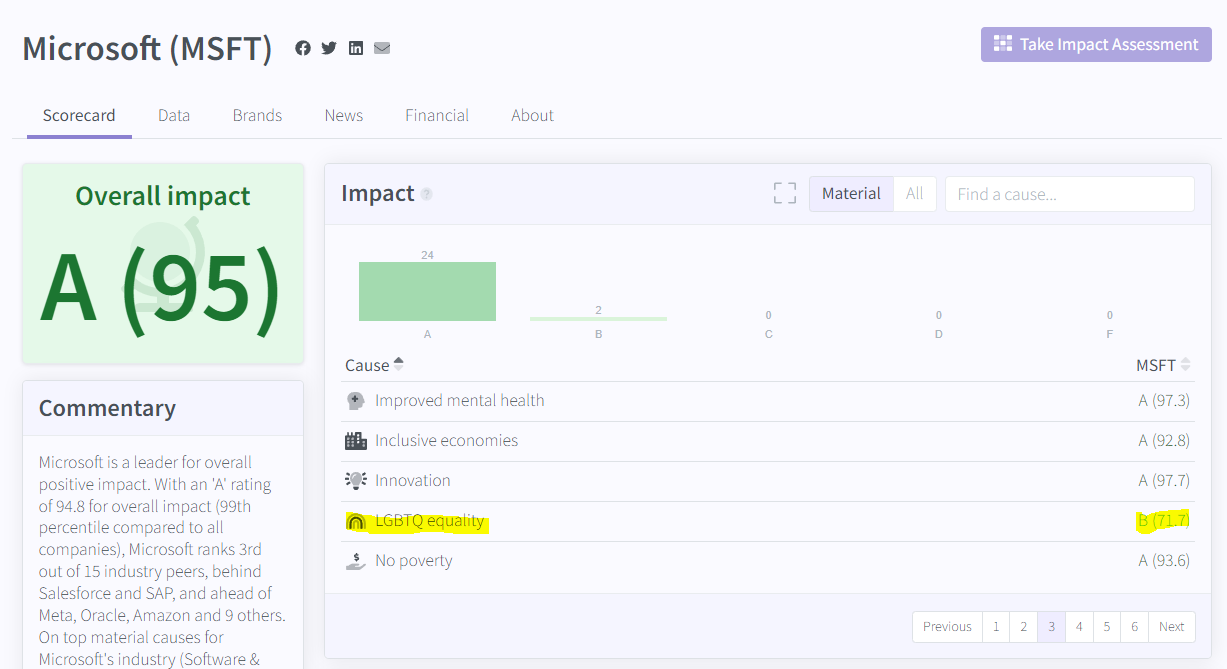

**Objectives:** Retrieve the score for `LGBTQ equality` on page 3 --> 71.7

In [37]:
link = 'https://www.ethosesg.com/companies/177'

## 4a) Verify that using `requests-html` does not work

Note, the only thing you need to show here is that the value `71.7` is not contained in the return HTML when using `requests` or `requests-html`

## 4b) Use Selenium

### Step 1: Configure Selenium

Selenium will communicate with a special version of your browser, I generally recommend to use the Chrome webdriver. 

Please follow the steps below:

1. Make sure you have Chrome installed on your computer.  
2. Check the version of your Chrome browser:  
    a) Click the 3 dots in the top right corner of your Chrome browser   
    b) Click "Help" --> "About Google Chrome"  
    c) Note down / Remember the version:   
    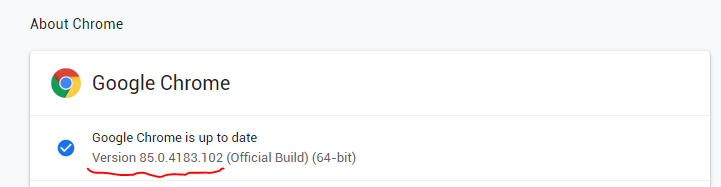
3. Download the right Chrome webdriver:  
    a) Open up: https://chromedriver.chromium.org/downloads  
    b) Download the version that matches your Chrome version (from step 2c).  
    c) Extract the `chromedriver` file to an easy to find location
4. Update the code below to the path of the `chromedriver` file from step 3c. 


In [63]:
CHROME = r"C:\chromedriver105.exe" # <-- change this
os.environ ["webdriver.chrome.driver" ] = CHROME

### Test to make sure it works:  

After running the code below you should see a Chrome window open up that shows the following:  

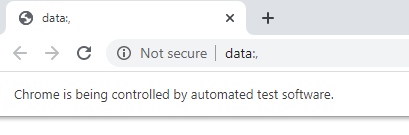

In [113]:
testDriver = webdriver.Chrome(CHROME)

## You will probably get a depreciation warning, which you can ignore for now.

F:\Temp\ipykernel_24040\2056967982.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  testDriver = webdriver.Chrome(CHROME)


In [114]:
testDriver.close() 

### Step 2: Open up a Chrome window that is controlled by Selenium and open up the web page

### Step 3: Create code to automatically click on the "3" to go to page three

This isn't step isn't nescessary here as the data for all pages is loaded at once for this website, however, in other cases the data only loads when actually navigation to the page, so I am having you do this just for practice sake. :)

The CSS selector for the "3" button is `.paginate_button > a[data-dt-idx="3"]`

After you successfully execute the commands you should see that you are now on page three in the Selenium-controlled Chrome window. 

Useful resources:  

- https://selenium-python.readthedocs.io/locating-elements.html  
- https://selenium-python.readthedocs.io/navigating.html

### Step 4: Retrieve the value for `LGBTQ equality`

The CSS selector is: `.impact_by_formula_wrapper tr[data-record-name="LGBTQ equality"]`

**Note:** The end objective is to get end up with the following value: `LGBTQ equality\nB(71.7)`

## 4c) Reverse engineer internal API calls

Step 4b shows that the Selenium approach works, however, it will be relatively slow and cumbersome to run this for all companies. 

Fortunately there is another alternative --> reverse engineer the internal API call that loads the value for LGBTQ equality

### Step 1: Check the internal API calls using Chrome Dev Tools

Follow these steps:

1. Open up the web page in a Chrome window  
2. Open up the Chrome Dev Tools panel, by either:
    - Right clicking anywhere on the web page and clicking "inspect"
    - Using the shortcut "CTRL + SHIFT + J" or "Command + Option + J"
3. Click on the `network tab` and select `Fetch/XHR` 

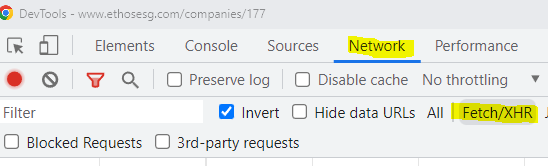

4. Reload the page (keep the dev tools panel open)
5. Check the network traffic (i.e., API calls) that show up 

You can click on them and it will show you a lot of information. The thing you ultimately care about is the information that show up under `response`:

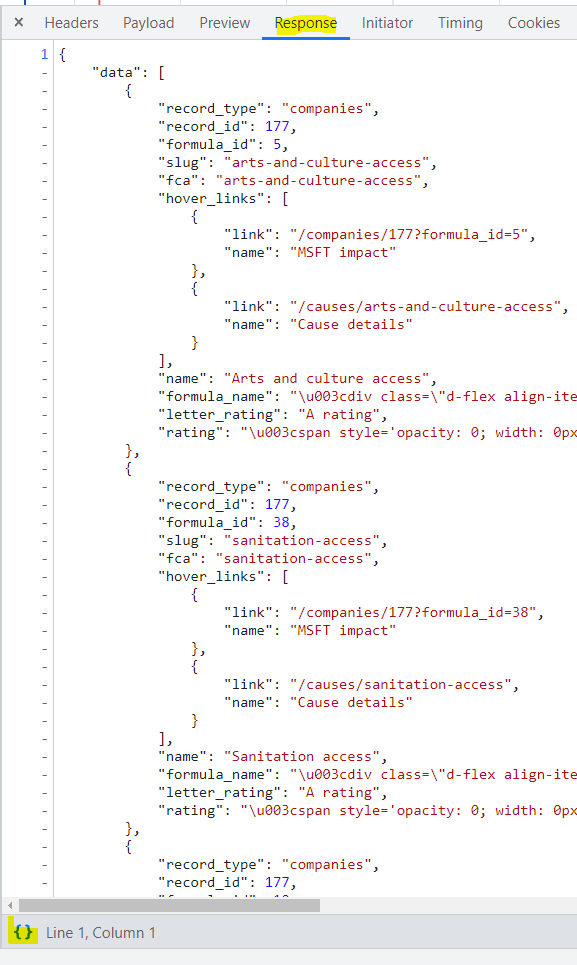

*Tip:* you can click on the curly brackets to make the response easier to read.

**End objective:** Find the API link that will yield a response that includes the LGBTQ equality score and assign it to Python variable

### Step 2: use `requests` to make a get request to the internal API you found in step 1 and parse the result to get the value for `LGBTQ equality`

*Hint:* If the result looks like a Python dictionary and/or a list it is generally formatted as JSON.

**Note:** You will end up with a weird looking HTML string. To get the rating itself out of that string you can use a regular expression, which will discuss in class 4. For the time being, you can parse the string with the following code:

```python
rating_string = '<span style=\'opacity: 0; width: 0px;\'>71.73</span><span class="d-inline-block"><span class="text-b-rating mr-1">B</span><span class="text-b-rating">(71.7)</span></span>' ## This you would obviously get automatically through your code

score = re.findall('>(.*?)<', rating_string)[0]
print(score)
# 71.73
```